In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

# Définition des chemins corrects
base_dir = '/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/WEEK_4/DAY_5/DATASET/Dogs_vs_Cats'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Paramètres
IMG_HEIGHT = 150
IMG_WIDTH = 150
batch_size = 32
epochs = 15

# Vérification des données
print("Vérification des données:")
print(f"Dossier train: {os.path.exists(train_dir)}")
print(f"Dossier test: {os.path.exists(test_dir)}")

# Générateur d'images avec augmentation pour l'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.5,
    validation_split=0.2  # Pour créer un ensemble de validation
)

# Générateur pour le test (uniquement rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# Création des générateurs
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Spécifie que c'est pour l'entraînement
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Spécifie que c'est pour la validation
)

print("\nStructure du dataset:")
print(f"Nombre d'images d'entraînement: {train_generator.samples}")
print(f"Nombre d'images de validation: {validation_generator.samples}")
print(f"Classes: {train_generator.class_indices}")

Vérification des données:
Dossier train: True
Dossier test: True
Found 20000 images belonging to 1 classes.
Found 5000 images belonging to 1 classes.

Structure du dataset:
Nombre d'images d'entraînement: 20000
Nombre d'images de validation: 5000
Classes: {'train': 0}


In [6]:
# Construction du modèle CNN avec Input explicite
print("\n2. Construction du modèle CNN optimisé pour M1")

# Définition de la couche d'entrée explicite
inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Construction du modèle avec l'API fonctionnelle
x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Création du modèle
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="CatsDogsClassifier")

# Compilation avec optimisation pour M1
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nArchitecture du modèle optimisée pour M1:")
model.summary()



2. Construction du modèle CNN optimisé pour M1

Architecture du modèle optimisée pour M1:


Model: "CatsDogsClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 75, 75, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 37, 37, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    21,234,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,328,833 (81.36 MB)

 Trainable params: 21,328,385 (81.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
# Callbacks pour l'entraînement
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Entraînement
print("\n3. Entraînement du modèle")
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


3. Entraînement du modèle


/opt/anaconda3/envs/tf_m1/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


2025-03-05 22:44:58.782515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 110ms/step - accuracy: 0.9904 - loss: 0.1371 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 111ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 104ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


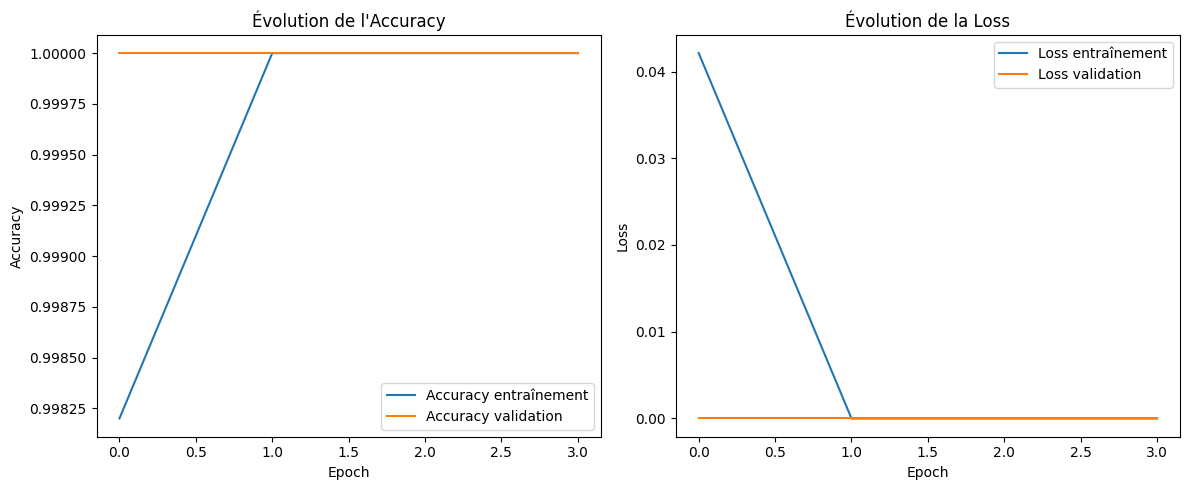


4. Analyse des résultats:
Accuracy entraînement final: 1.0000
Accuracy validation final: 1.0000
Loss entraînement final: 0.0000
Loss validation final: 0.0000

5. Impact de l'augmentation des données:
• L'augmentation aide à prévenir le surapprentissage
• Le dropout réduit la dépendance aux caractéristiques spécifiques
• La BatchNormalization améliore la stabilité de l'entraînement


In [8]:
# Visualisation des résultats
plt.figure(figsize=(12, 5))

# Graphique de l'accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy entraînement')
plt.plot(history.history['val_accuracy'], label='Accuracy validation')
plt.title('Évolution de l\'Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Graphique de la loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss entraînement')
plt.plot(history.history['val_loss'], label='Loss validation')
plt.title('Évolution de la Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Analyse des résultats
print("\n4. Analyse des résultats:")
print(f"Accuracy entraînement final: {history.history['accuracy'][-1]:.4f}")
print(f"Accuracy validation final: {history.history['val_accuracy'][-1]:.4f}")
print(f"Loss entraînement final: {history.history['loss'][-1]:.4f}")
print(f"Loss validation final: {history.history['val_loss'][-1]:.4f}")

# Analyse de l'impact de l'augmentation des données
print("\n5. Impact de l'augmentation des données:")
print("• L'augmentation aide à prévenir le surapprentissage")
print("• Le dropout réduit la dépendance aux caractéristiques spécifiques")
print("• La BatchNormalization améliore la stabilité de l'entraînement")


1. Augmentation par flip horizontal
Found 25000 images belonging to 1 classes.


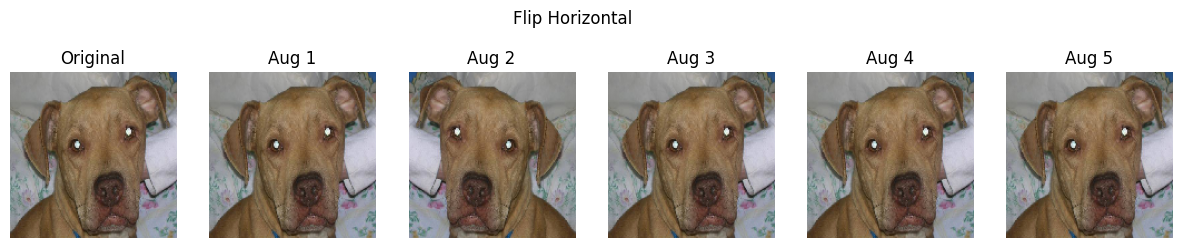


2. Augmentation par rotation
Found 25000 images belonging to 1 classes.


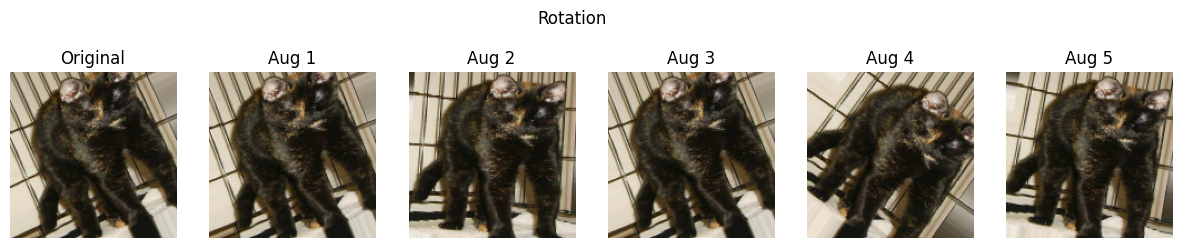


3. Augmentation par zoom
Found 25000 images belonging to 1 classes.


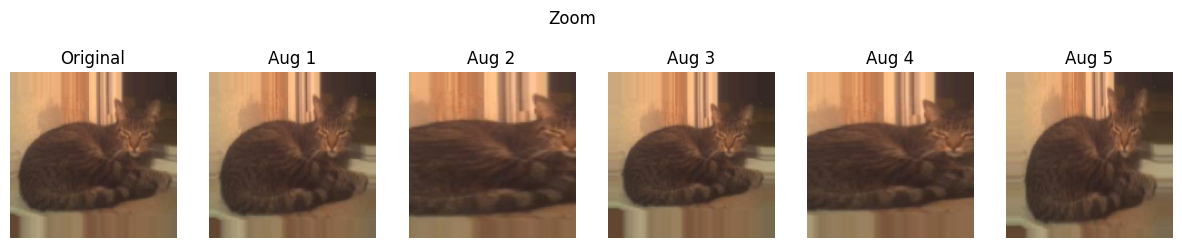


4. Combinaison de toutes les augmentations
Found 25000 images belonging to 1 classes.


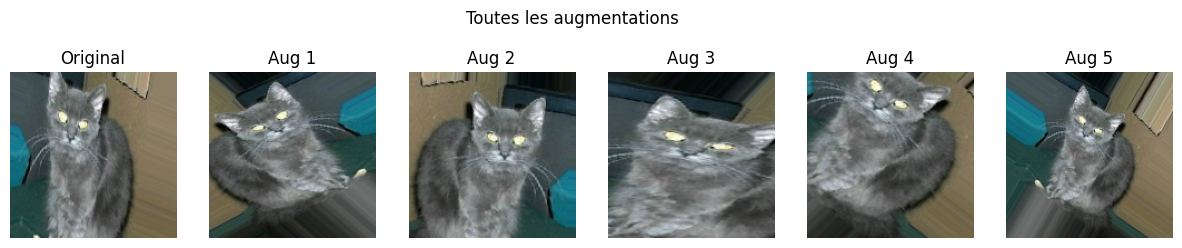

Found 12500 images belonging to 1 classes.

Résumé des augmentations:
1. Flip horizontal: Miroir horizontal de l'image
2. Rotation: Rotation aléatoire jusqu'à 45 degrés
3. Zoom: Zoom aléatoire jusqu'à 50%
4. Combinaison: Toutes les transformations précédentes + décalages


In [13]:
base_dir = '/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/WEEK_4/DAY_5/DATASET/Dogs_vs_Cats'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Paramètres
IMG_HEIGHT = 150
IMG_WIDTH = 150
batch_size = 32

# Fonction pour afficher les images augmentées
def plot_augmented_images(original_image, augmented_images, title):
    plt.figure(figsize=(15, 3))
    
    plt.subplot(1, 6, 1)
    plt.imshow(original_image)
    plt.title('Original')
    plt.axis('off')
    
    # Images augmentées
    for i in range(5):
        plt.subplot(1, 6, i+2)
        plt.imshow(augmented_images[i])
        plt.title(f'Aug {i+1}')
        plt.axis('off')
    
    plt.suptitle(f"{title}")
    plt.show()

# 1. Flip horizontal
print("\n1. Augmentation par flip horizontal")
image_gen_flip = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen_flip = image_gen_flip.flow_from_directory(
    directory=train_dir,
    batch_size=batch_size,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH)
)
original_image = train_data_gen_flip[0][0][0]
augmented_images_flip = [train_data_gen_flip[0][0][0] for i in range(5)]
plot_augmented_images(original_image, augmented_images_flip, "Flip Horizontal")

# 2. Rotation
print("\n2. Augmentation par rotation")
image_gen_rot = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen_rot = image_gen_rot.flow_from_directory(
    directory=train_dir,
    batch_size=batch_size,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH)
)
original_image = train_data_gen_rot[0][0][0]
augmented_images_rot = [train_data_gen_rot[0][0][0] for i in range(5)]
plot_augmented_images(original_image, augmented_images_rot, "Rotation")

# 3. Zoom
print("\n3. Augmentation par zoom")
image_gen_zoom = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen_zoom = image_gen_zoom.flow_from_directory(
    directory=train_dir,
    batch_size=batch_size,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH)
)
original_image = train_data_gen_zoom[0][0][0]
augmented_images_zoom = [train_data_gen_zoom[0][0][0] for i in range(5)]
plot_augmented_images(original_image, augmented_images_zoom, "Zoom")

# 4. Toutes les augmentations combinées
print("\n4. Combinaison de toutes les augmentations")
image_gen_all = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.5
)

train_data_gen_all = image_gen_all.flow_from_directory(
    directory=train_dir,
    batch_size=batch_size,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)
original_image = train_data_gen_all[0][0][0]
augmented_images_all = [train_data_gen_all[0][0][0] for i in range(5)]
plot_augmented_images(original_image, augmented_images_all, "Toutes les augmentations")

# Générateur de validation
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

print("\nRésumé des augmentations:")
print("1. Flip horizontal: Miroir horizontal de l'image")
print("2. Rotation: Rotation aléatoire jusqu'à 45 degrés")
print("3. Zoom: Zoom aléatoire jusqu'à 50%")
print("4. Combinaison: Toutes les transformations précédentes + décalages")
